In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

kidney_disease = pd.read_csv(r'Data/original_dataset.csv')
display(kidney_disease)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
kidney_disease.shape

(400, 26)

- 25 features et une target 
- 400 valeurs possible for each feature / target


# Rename columns

In [4]:
kidney_disease.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'classification']

# Data understanding 

- Specific_gravity:  urine specific gravity results will fall [1.002 , 1.030] if your kidenys are functioning normally (determine how well your kidneys are diluting your urine).


    - Higher the number of specific gravity -> dehydrated
    - Lower the number of specific gravity ->  hydrated
    - Good health = [1.002 , 1.030]


- Albumin: is a protein found in the blood. A healthy kidney doesn’t let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine. The less albumin in your urine, the better.


    - Good health = 0 (maybe)


- Red_blood_cells : (Anemia is common in people who have chronic kidney disease Anemia is common in people who have chronic kidney disease). Red blood cells are made by the bone marrow. To get the marrow to make red blood cells, the kidneys make a hormone called erythropoietin, or EPO. When the kidneys are damaged, they may not make enough EPO. Without enough EPO, the bone marrow does not make enough red blood cells, and you have anemia.


    - Normal -> good health
    - Abnormal -> sick
    

- Sugar :


    - 0 -> good health
    - 0 > (greater then 0) sick (not sure)
    

- Pus cells are a collection of dead, white blood cells that accumulates when the body’s immune system activates in response to an infection:


    - Normal -> small quantite in the urine (health person)
    - Abnormal -> not .. (maybe sick)


- pus_cell_clumps the present in the urine:


    - notpresent -> not sick 
    - present -> maybe sick
    

- Bacteria the present in the urine:


    - notpresent -> not sick (maybe)
    - present -> maybe sick
    
    

- blood_glucose_random the present in the urine:


    - the recommended targets for most people are:
        - Before meals: 90-130 mg/dL
        
        
    - Two hours after the start of a meal: Below 180 mg/dL
        - 90 – 180 -> maybe health
        - Else maybe sick



- blood urea : Urea nitrogen is a waste product that your kidneys remove from your blood. Higher than normal BUN levels may be a sign that your kidneys aren't working well:


    - 7 - 20 mg/dL is a normal level -> maybe healthy
    - Else maybe sick  
    

- pus_cell_clumps the present in the urine:


    - notpresent -> not sick 
    - present -> maybe sick


In [5]:
# Delete the column id -> no need for the ID it will not improve the detection
kidney_disease.drop('id', inplace=True, axis=1)

# Analyses of features and target value

In [6]:
kidney_disease.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

### Conclusion :
- We need to handle the object type and converted to number

In [7]:
for col in kidney_disease:
    if(kidney_disease[col].dtype==object):
        print(col)
        print(kidney_disease[col].unique())

red_blood_cells
[nan 'normal' 'abnormal']
pus_cell
['normal' 'abnormal' nan]
pus_cell_clumps
['notpresent' 'present' nan]
bacteria
['notpresent' 'present' nan]
packed_cell_volume
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white_blood_cell_count
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '880

### Conclusion:
    - classification , coronary_artery_disease , diabetes_mellitus : need to change an correct format like ckd\t become ckd (Noisy)
    - red_blood_cell_count , white_blood_cell_count , packed_cell_volume : need to be converted to number
    - Handle null value
    - Final step the rest of value we need to encode and scale them for the machine learning algorthme

### Transforme red_blood_cell_count , white_blood_cell_count , packed_cell_volume to number

In [8]:
kidney_disease['packed_cell_volume']=pd.to_numeric(kidney_disease['packed_cell_volume'], errors='coerce')

kidney_disease['white_blood_cell_count']=pd.to_numeric(kidney_disease['white_blood_cell_count'], errors='coerce')

kidney_disease['red_blood_cell_count']=pd.to_numeric(kidney_disease['red_blood_cell_count'], errors='coerce')

## L'option coerce -> premet de convertir en numerique et si la transformation est impossible alors on aura NaN 


### Correct format (Noisy) for classification , coronary_artery_disease , diabetes_mellitus

In [9]:
kidney_disease['classification'] =  kidney_disease['classification'].replace(['ckd\t'], ['ckd'])

kidney_disease['coronary_artery_disease'] =  kidney_disease['coronary_artery_disease'].replace(['\tno'], ['no'])

kidney_disease['diabetes_mellitus'] =  kidney_disease['diabetes_mellitus'].replace([' yes','\tno','\tyes'], ['yes','no','yes'])


In [10]:
for col in kidney_disease:
    if(kidney_disease[col].dtype==object):
        print(col)
        print(kidney_disease[col].unique())

red_blood_cells
[nan 'normal' 'abnormal']
pus_cell
['normal' 'abnormal' nan]
pus_cell_clumps
['notpresent' 'present' nan]
bacteria
['notpresent' 'present' nan]
hypertension
['yes' 'no' nan]
diabetes_mellitus
['yes' 'no' nan]
coronary_artery_disease
['no' 'yes' nan]
appetite
['good' 'poor' nan]
peda_edema
['no' 'yes' nan]
aanemia
['no' 'yes' nan]
classification
['ckd' 'notckd']


## Exploratory Data Analysis

#### pourcentage of null value

In [11]:
(kidney_disease.isnull().sum() / len(kidney_disease))*100

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
classification              0.00
dtype: float64

In [12]:
kidney_disease.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

#### Need first to handle empty value before doing corrleation because we have some high pourcentage

#### Divide data into continues and discret variable 

In [13]:
continuousCol =[]
discreteCol =[]
for col in kidney_disease:
    if(kidney_disease[col].dtype==object):
        discreteCol.append(col)
    else:
        continuousCol.append(col)

In [14]:
print("continuous Column names")
continuousCol

continuous Column names


['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [15]:
print("discrete Column names")
discreteCol

discrete Column names


['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'classification']

## Continuous variable 

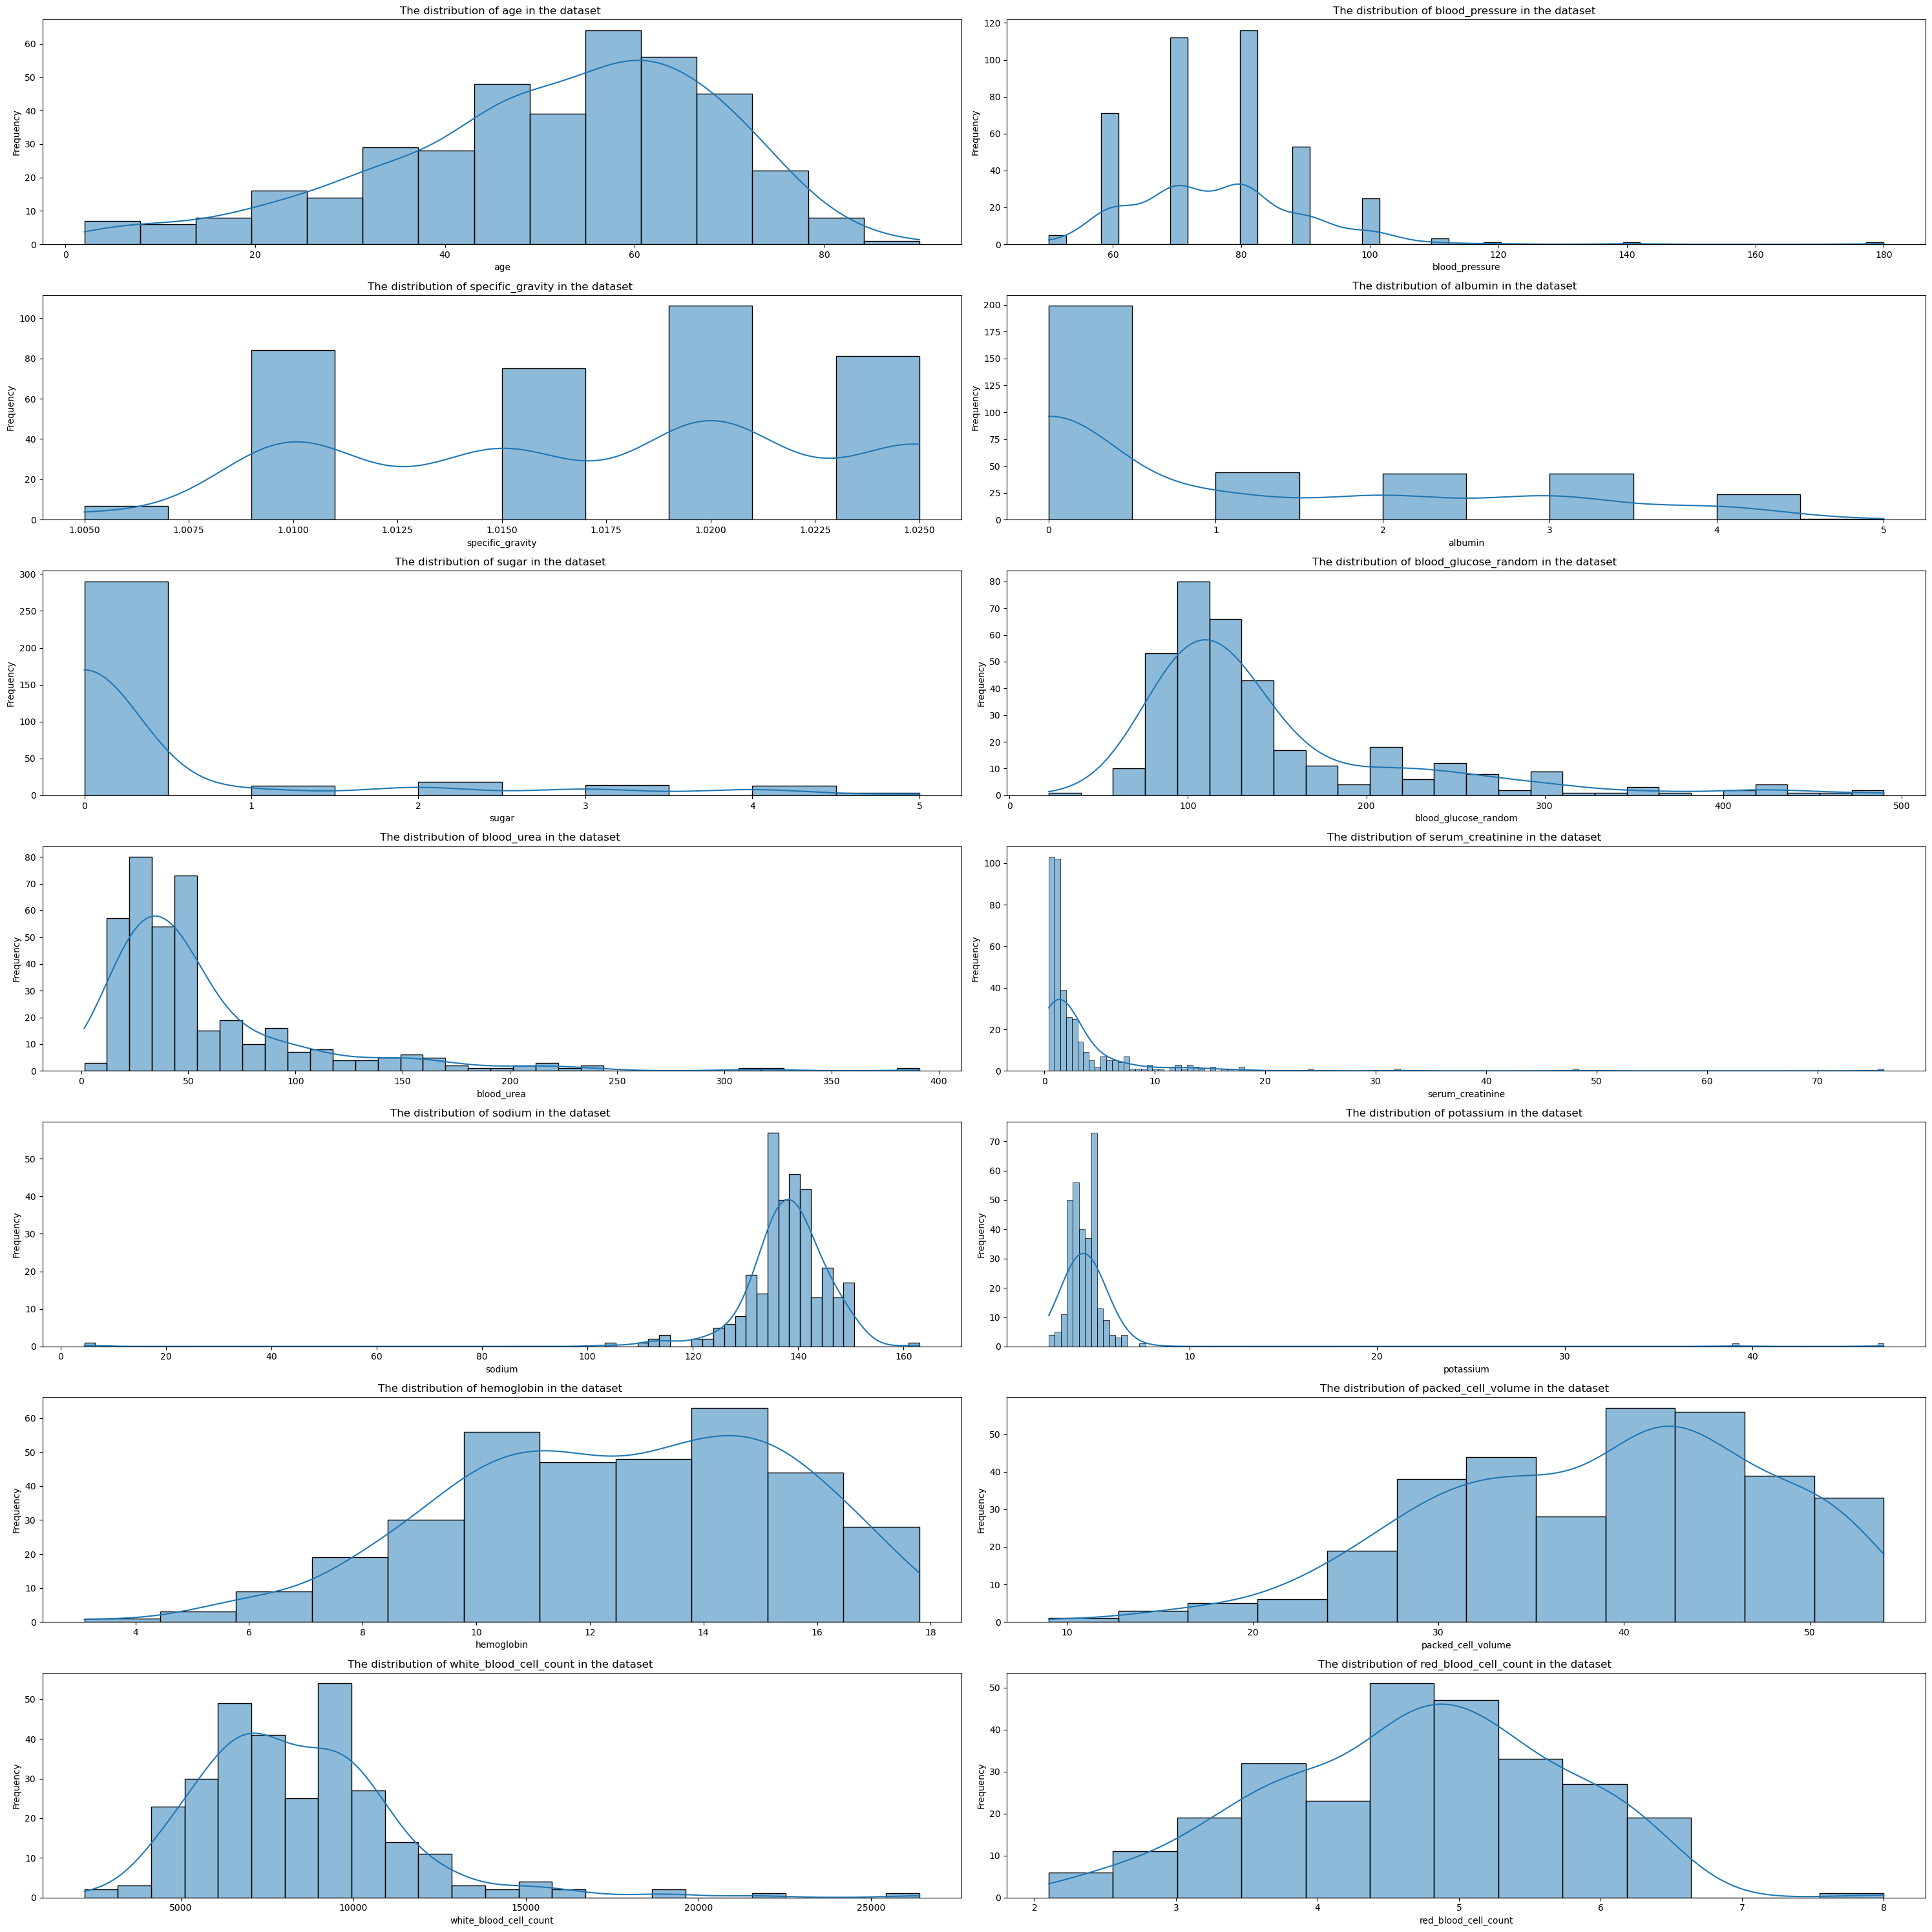

In [16]:
fig, axs = plt.subplots(7, 2, figsize=(30, 30))


for index,col in enumerate(continuousCol):

    sns.histplot(data=kidney_disease[col],ax=axs[index//2 , index%2] ,kde=True)

    # set the title and axis labels
    axs[index//2 , index%2].set_title('The distribution of '+ col +' in the dataset ')
    axs[index//2 , index%2].set_xlabel(col)
    axs[index//2 , index%2].set_ylabel('Frequency')
    

plt.tight_layout()
plt.show()

#### for features with no a lot of null value we reaplaced by the mode (less and equal then 10%)
I have choose the mode over the mean because a lot of variable have big outlier

In [17]:
kidney_disease['age'].median()

55.0

In [18]:
for col in continuousCol:
    if((kidney_disease[col].isnull().sum() / len(kidney_disease))*100 <=10):
        median=kidney_disease[col].median()
        kidney_disease[col] = kidney_disease[col].fillna(median)

In [19]:
kidney_disease[continuousCol].isnull().sum()

age                         0
blood_pressure              0
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                  0
serum_creatinine            0
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

KNNImputer is an imputation technique that works by using the k-nearest neighbors algorithm to impute missing values in a dataset. The basic idea behind KNNImputer is to replace each missing value in a feature with the average of the values of the k-nearest neighbors of that feature in the dataset.

Here are the steps that KNNImputer follows to impute missing values:

    - Compute the distance between each pair of samples in the dataset using a distance metric, such as Euclidean distance or Manhattan distance.
    
    - For each sample in the dataset that has a missing value in a feature, identify the k-nearest neighbors of that sample based on the distances computed in step 1. The k-nearest neighbors are the samples with the smallest distances to the sample with the missing value.
    
    - Compute the average value of the feature in the k-nearest neighbors identified in step 2, and use this value to impute the missing value in the feature for the sample with the missing value.
    
    - Repeat steps 2 and 3 for all samples in the dataset that have missing values in the feature.

The value of k is a hyperparameter that needs to be specified by the user. A larger value of k means that more neighbors will be used to impute each missing value, which can lead to smoother imputations but may also be more computationally expensive.

It's worth noting that KNNImputer assumes that the missing values are missing at random, and that the distribution of the non-missing values in the feature is approximately the same as the distribution of the non-missing values in the nearest neighbors. If these assumptions do not hold, the imputed values may be biased or inaccurate.

## Discret varaible 

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

#### for features with no a lot of null value we reaplaced by the big categorie (less and equal then 10%)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
        

for col in discreteCol:
    if((kidney_disease[col].isnull().sum() / len(kidney_disease))*100 <=10):
        kidney_disease[col]=kidney_disease[col].value_counts().index[0]


In [32]:
kidney_disease[discreteCol].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              0
bacteria                     0
hypertension                 0
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
peda_edema                   0
aanemia                      0
classification               0
dtype: int64

## More then 10 %

In [38]:
#OneHotEncoder
#scaling the data
#knninpute



In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
kidney_disease_continuousCol_imputed = imputer.fit_transform(kidney_disease[continuousCol])

## Corrlation Test 

In [ ]:
# .corr() => between continues variable
# .crosstab() and chi2_contingency() => between categorical variable
# f_oneway() => between cont and dis variable  

# Boolean columns
## Replace wrong values

In [ ]:
''''
boolean_columns = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'classification']
for column in boolean_columns:
    distinct_values =  kidney_disease[column].dropna().unique()
    first_check = True
    print(distinct_values)
    while len(distinct_values) > 2 :
        if first_check:
            print('\n' + column + ':')
            first_check = False
        else:
            print('Column not yet boolean, please retry\n')
        for value in distinct_values:
            is_replaced = input("\t- '" + value + "' : replace? (y/N)")
            if is_replaced == 'y':
                replacement = input('\t  replace by: ')
                kidney_disease[column] = kidney_disease[column].replace(value, replacement)
        distinct_values =  kidney_disease[column].dropna().unique()

print('\nBoolean columns now all contain only 2 distinct not-null values')
'''

## Convert to Boolean

In [ ]:

for column in [col for col in boolean_columns if col != "classification"]:
    distinct_values =  kidney_disease[column].dropna().unique()
    order = True
    print(column + ' : ' + str(distinct_values) + ' --> ' + str([order, not order]))
    is_reversed = input("Confirm order or reverse ? (C/r)")
    if is_reversed == 'r':
        order = not order
    kidney_disease[column] = kidney_disease[column].replace(distinct_values[0], order)
    print('\t- ' + distinct_values[0] + ' --> ' + str(order))
    kidney_disease[column] = kidney_disease[column].replace(distinct_values[1], not order)
    print('\t- ' + distinct_values[1] + ' --> ' + str(not order) + '\n')


# Drop useless columns

In [ ]:
# Delete the column id -> no need for the ID it will not improve the detection
useless_columns = ['']
kidney_disease.drop(useless_columns, inplace=True, axis=1)
kidney_disease

# Delete rows with missing necessary data

In [ ]:
# Data columns can't be fit into the Classifiers if they have Null values
data_columns = ['age', 'hypertension', 'diabetes_mellitus', 'serum_creatinine', 'coronary_artery_disease']
for column in data_columns:
    kidney_disease = kidney_disease[kidney_disease[column].notnull()]

# Save clean dataset into csv file

In [ ]:
kidney_disease.to_csv('Data/clean_dataset.csv', index=False)